Activity 2 - Modeling Intelligent Agents

*   Wealth Transfer Model



Completed: 100 steps
Run time: 0:00:00.139616
Simulation finished


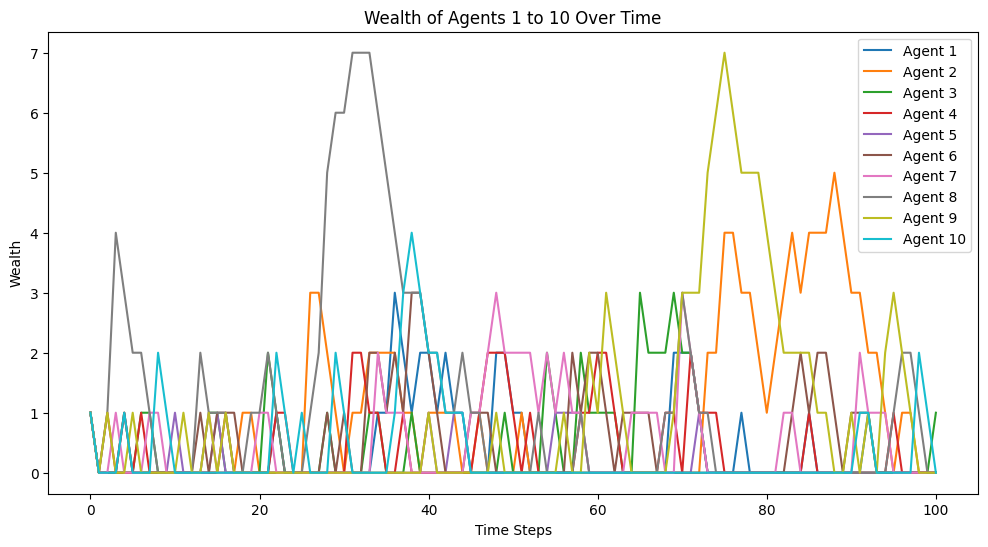

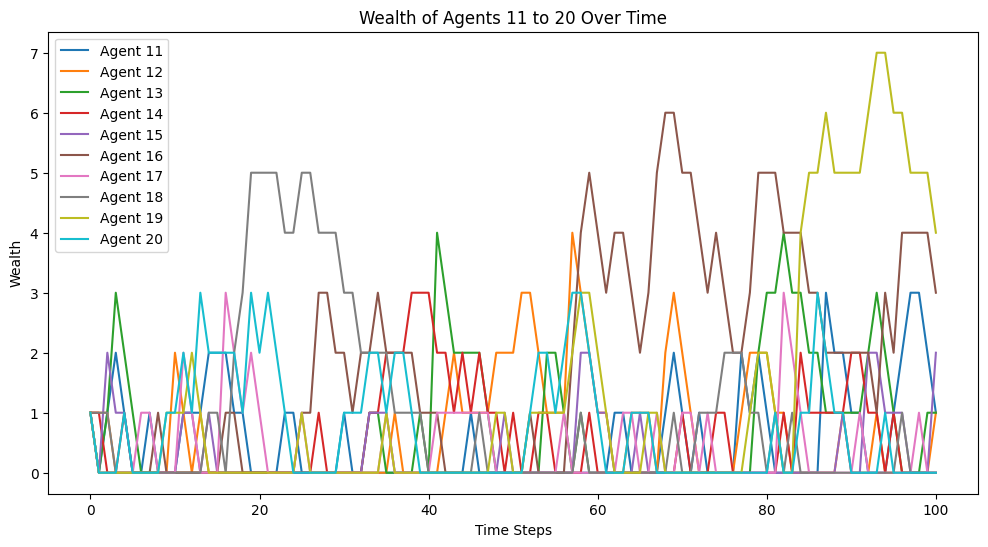

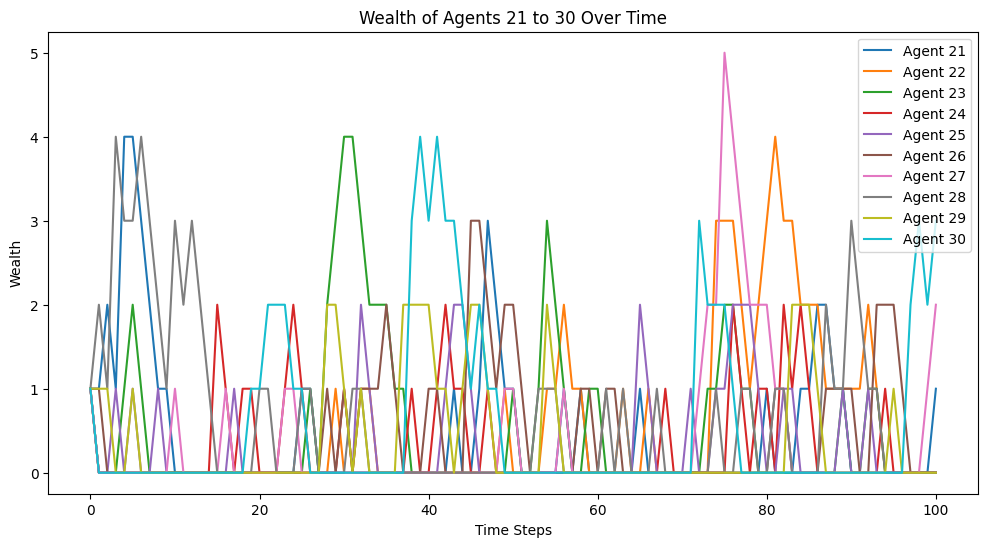

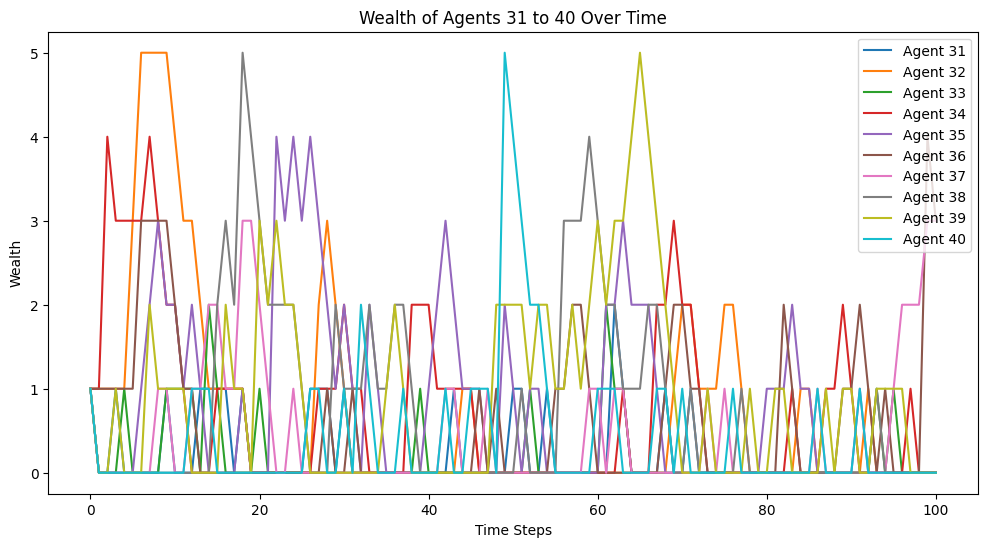

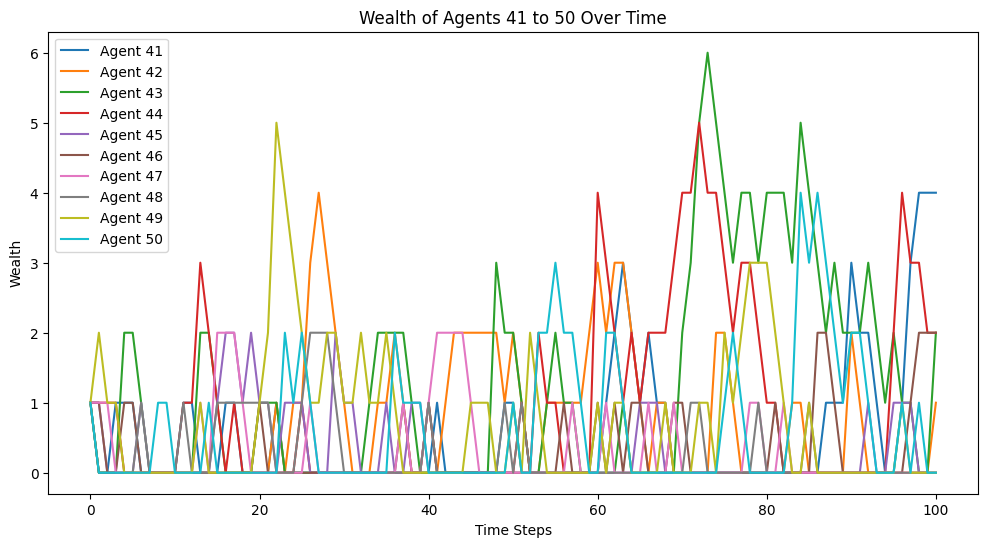

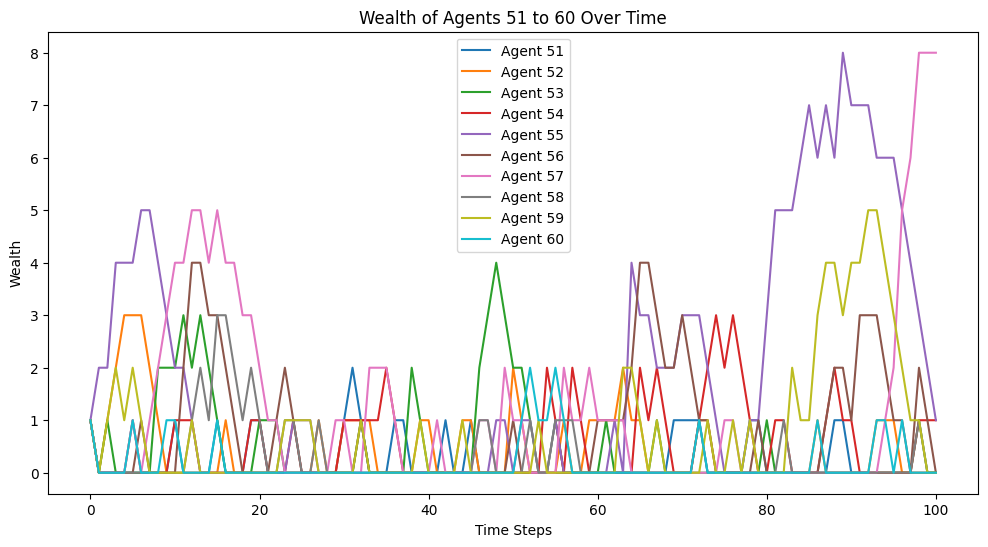

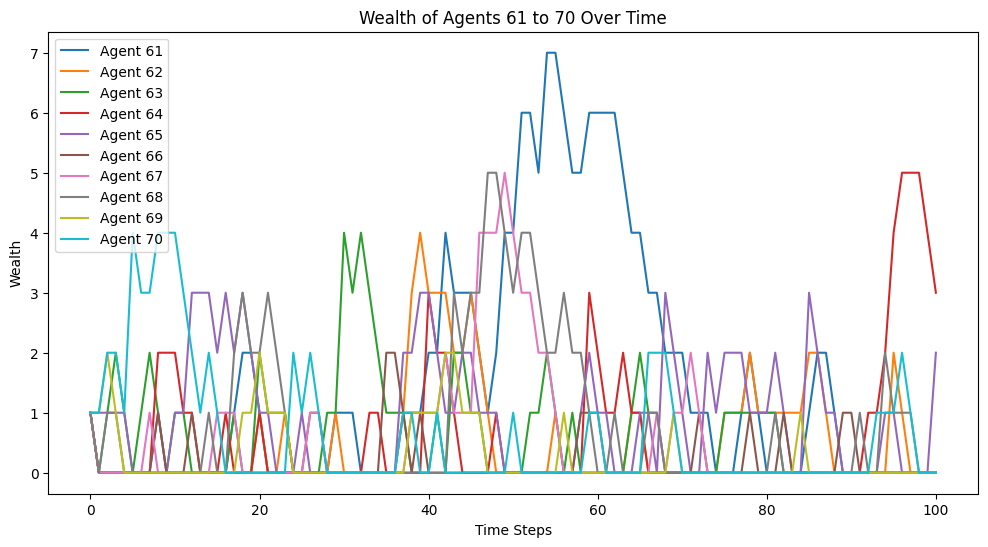

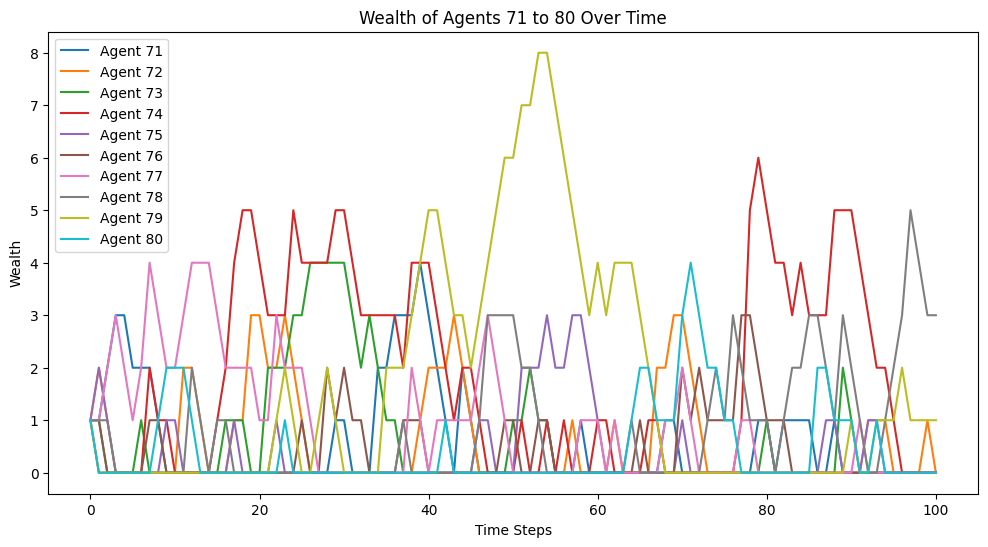

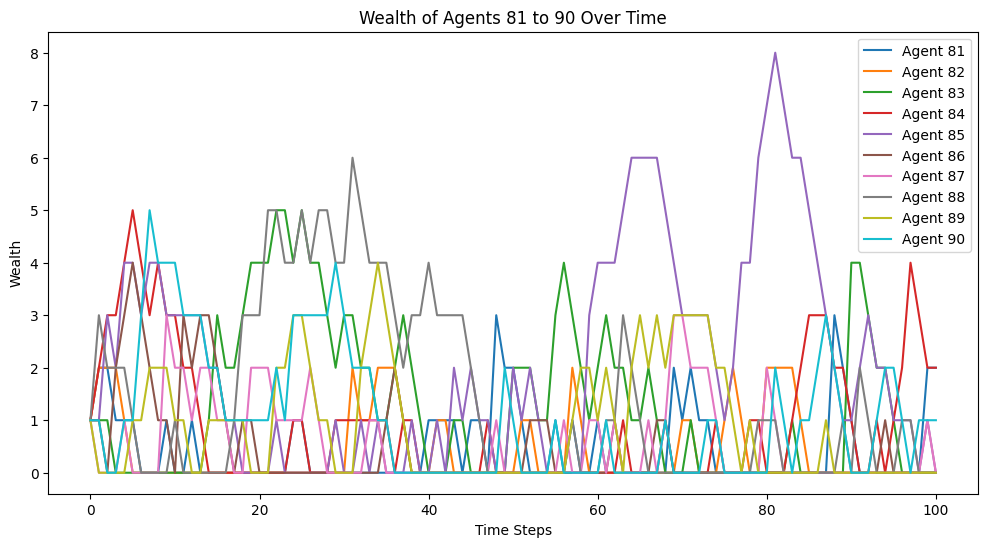

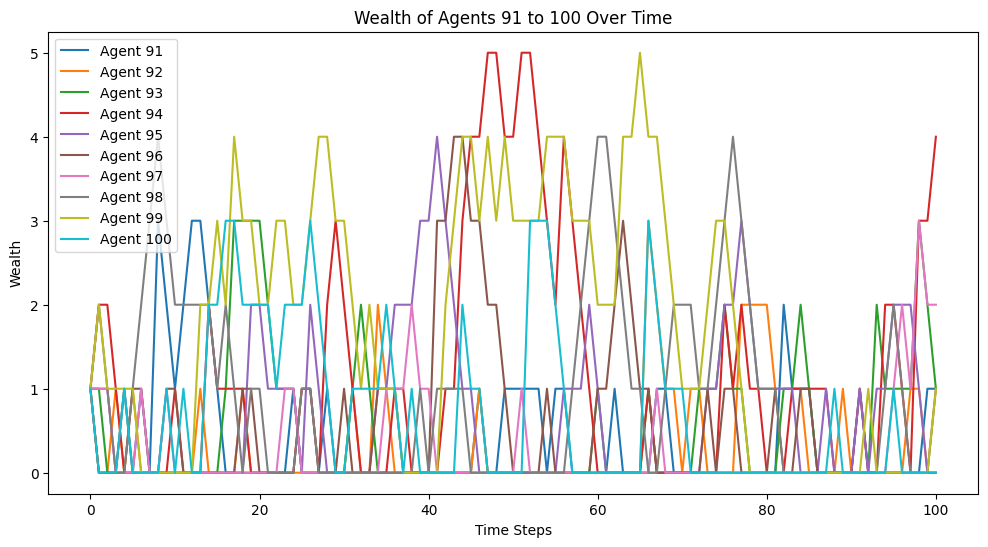

In [22]:
import agentpy as ap
import numpy as np
import matplotlib.pyplot as plt

class WealthAgent(ap.Agent):

    """ An agent with wealth """

    def setup(self):
        self.wealth = 1
        self.internal_states = {'action_count': 0, 'wealth_history': [self.wealth]}

    def see(self):
        # The agent observes its own wealth
        return {'wealth': self.wealth}

    def next(self, neighbors):
        # The agent selects a random neighbor as a partner for wealth transfer
        partner = self.model.agents.random()
        return partner

    def action(self, partner):
        # The agent performs the wealth transfer action
        if self.wealth > 0:
            partner = self.model.agents.random()
            partner.wealth += 1
            self.wealth -= 1
            self.internal_states['action_count'] += 1
        self.internal_states['wealth_history'].append(self.wealth)  # Updated here

class WealthModel(ap.Model):

    """ A simple model of random wealth transfers """

    def setup(self):
        self.agents = ap.AgentList(self, self.p.agents, WealthAgent)

    def step(self):
        for agent in self.agents:
            partner = agent.next(self.agents)
            agent.action(partner)

    def update(self):
        self.record('Gini Coefficient', gini(self.agents.wealth))

    def utility(self):
        action_counts = [agent.internal_states['action_count'] for agent in self.agents]
        wealth_history = [agent.internal_states['wealth_history'] for agent in self.agents]
        return {
            'action_counts': action_counts,
            'wealth_history': wealth_history,
        }

    def plot_agent_utilities(self, num_agents_per_plot=10):
        agent_utility = self.utility()
        wealth_history = agent_utility['wealth_history']

        num_agents = len(wealth_history)
        num_plots = num_agents // num_agents_per_plot + (num_agents % num_agents_per_plot > 0)

        for i in range(num_plots):
            plt.figure(figsize=(12, 6))
            for j in range(num_agents_per_plot):
                agent_index = i * num_agents_per_plot + j
                if agent_index < num_agents:
                    agent_history = wealth_history[agent_index]
                    plt.plot(agent_history, label=f'Agent {agent_index + 1}')

            plt.title(f'Wealth of Agents {i * num_agents_per_plot + 1} to {min((i+1) * num_agents_per_plot, num_agents)} Over Time')
            plt.xlabel('Time Steps')
            plt.ylabel('Wealth')
            plt.legend()
            plt.show()

parameters = {
    'agents': 100,
    'steps': 100,
    'seed': 42,
}

model = WealthModel(parameters)
results = model.run()


# Access agent utility function and plot wealth of agents in groups of 10
model.plot_agent_utilities(num_agents_per_plot=10)
